### FRAUD DETECTION

In this study, we will explore bank transaction dataset and use unsupervised learning algorithms to detect fraudalent transactions. 

Kaggle dataset: https://raw.githubusercontent.com/mehedihasanmir/Bank-Transaction-Dataset-for-Fraud-Detection/refs/heads/main/bank_transactions_data_2.csv

In [2]:
# Import libraries
# Data wrangling
import pandas as pd 
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

# Dimensionality reduction
from sklearn.decomposition import PCA

# Model training
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Import dataset
data = pd.read_csv("https://raw.githubusercontent.com/mehedihasanmir/Bank-Transaction-Dataset-for-Fraud-Detection/refs/heads/main/bank_transactions_data_2.csv")
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
data.shape

(2512, 16)

In [5]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Dataset contains 16 features, both categorical and numerical. Our goal is to extract only significant features and based on them, build unsupervised algorithms which can detect fraudalent transactions.

In [6]:
# Check if there are any NULL values
data.isnull().sum()/len(data)

TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance             0.0
PreviousTransactionDate    0.0
dtype: float64

In [7]:
# Show descriptive statistics
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Exploratory Data Analysis

We will start the analysis with EDA. First, we will check data correlation and distribution of some important features. We will also find significant features which can be used in further analysis.

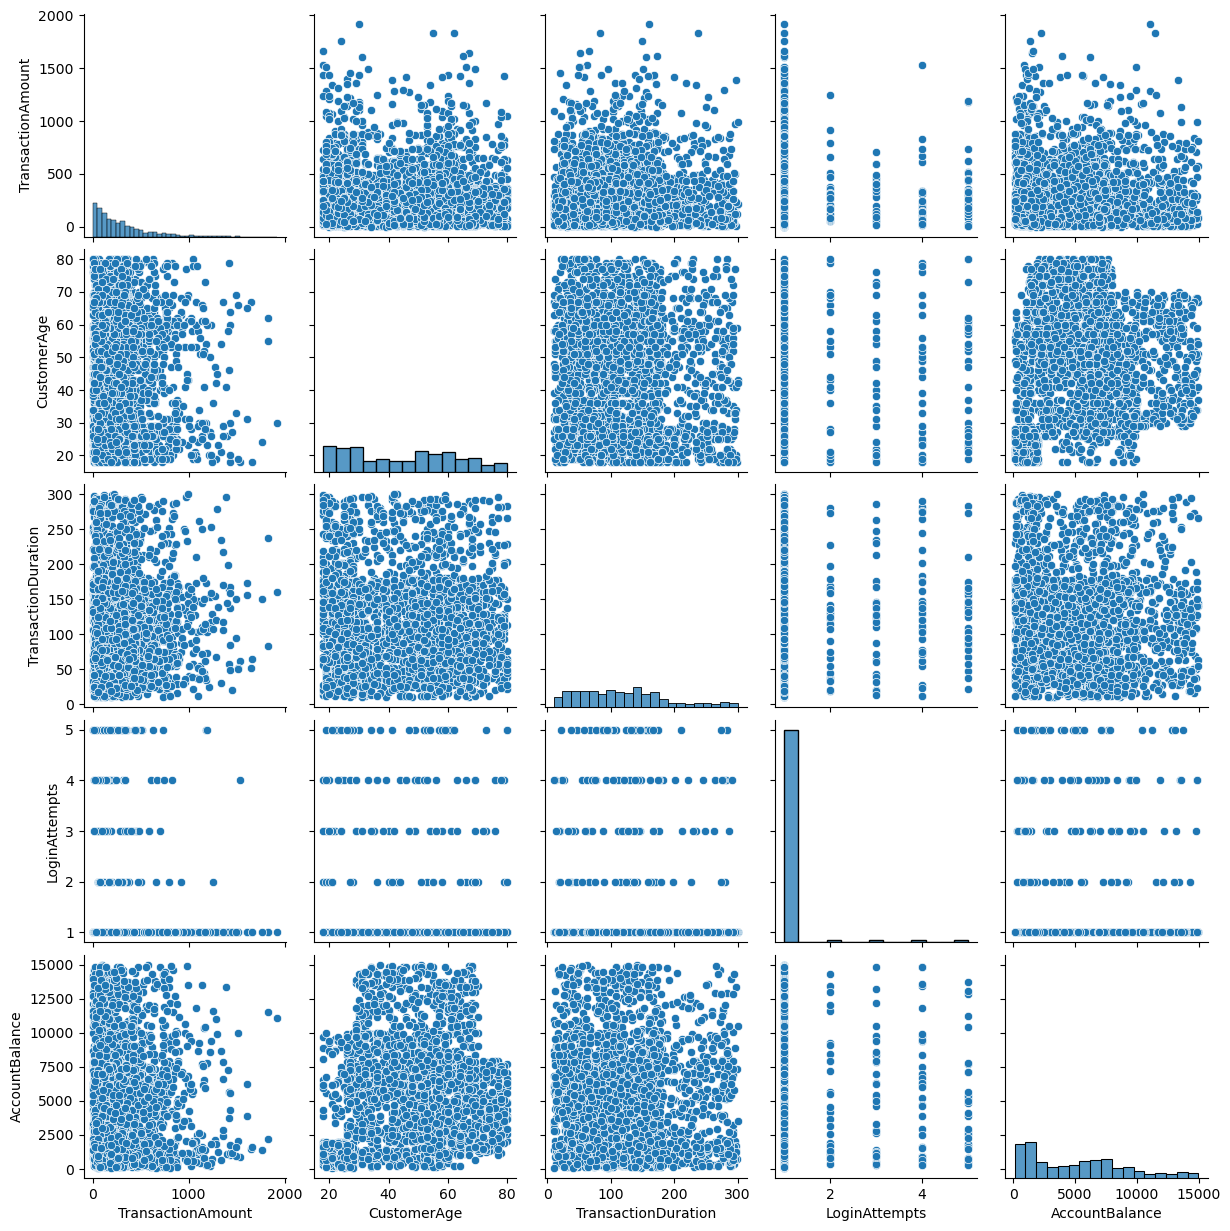

In [8]:
# Check correlation between numeric features
sns.pairplot(data)

There are no interesting correlations between features. We can see outliers in LoginAttempts and TransactionAmount. 

Let's explore distribution of TransactionAmount, TransactionType, LoginAttempts and AccountBalance variables.

<AxesSubplot:xlabel='TransactionAmount', ylabel='Count'>

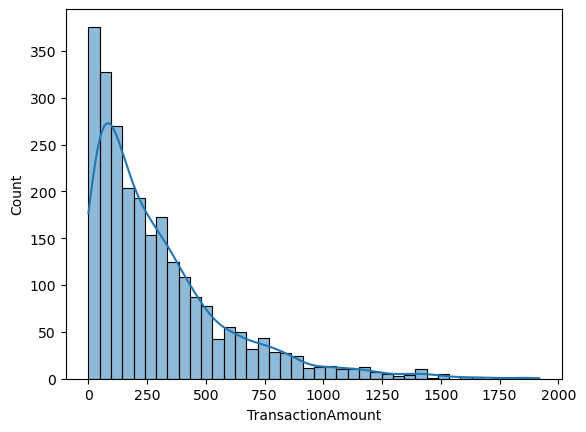

In [9]:
sns.histplot(data['TransactionAmount'], kde=True)

<AxesSubplot:xlabel='LoginAttempts', ylabel='Count'>

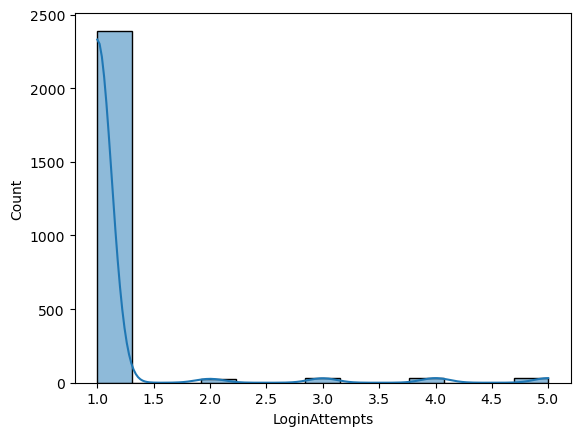

In [10]:
sns.histplot(data['LoginAttempts'], kde=True)

From above plots we can see that the distributions are skewed. Some of those outliers may indicate fraudalent transactions.

<AxesSubplot:xlabel='TransactionDuration', ylabel='Count'>

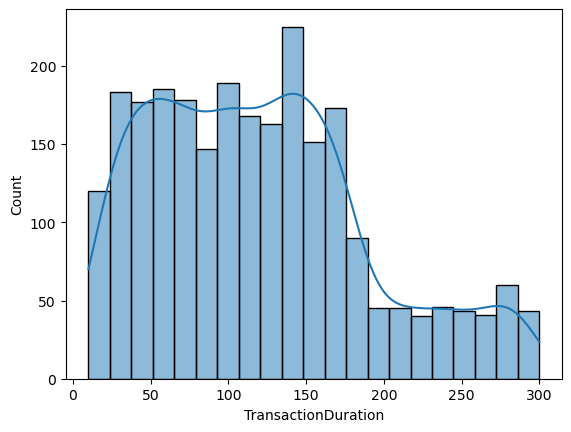

In [11]:
sns.histplot(data['TransactionDuration'], kde=True)

<AxesSubplot:ylabel='TransactionDuration'>

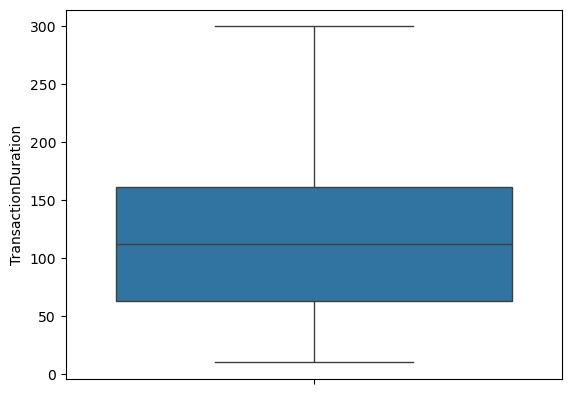

In [12]:
sns.boxplot(data['TransactionDuration'])

There are no immediate outliers in TransactionDuration column.

<AxesSubplot:xlabel='count', ylabel='TransactionType'>

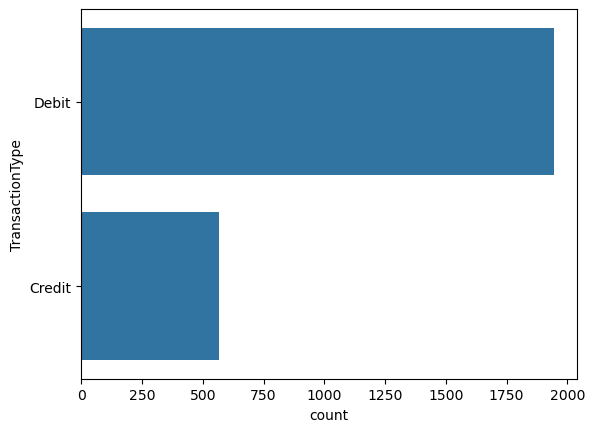

In [13]:
sns.countplot(data['TransactionType'])

Now, we will merge TransactionDate and PreviousTransactionDate to one column by calculating the difference between those two.

In [14]:
data['TimeDelta'] = pd.to_datetime(data['PreviousTransactionDate']) - pd.to_datetime(data['TransactionDate']) 
data['TimeDelta'] = data['TimeDelta'].dt.total_seconds()

In [15]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDelta
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,49477134.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,42823516.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,41694656.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,47403415.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,33228915.0


Now, we will focus on extracting significant features. We can remove some features from the dataset which are redundant. Then we will encode categorical features and standarize numerical ones. Those transformation will increase dimensionality of the data, so to check which features contain most information and are significant, we will use PCA.

In [16]:
data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TimeDelta'],
      dtype='object')

In [17]:
contingency_table = pd.crosstab(data['IP Address'], data['Location'])

chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)
print(p_value) # p_value > 0.05 => we can keep both features

0.7168972223703519


In [18]:
data.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'MerchantID','Channel', 'CustomerAge', 'CustomerOccupation','PreviousTransactionDate'], inplace=True)

In [19]:
data.head()

,TransactionAmount,TransactionType,Location,DeviceID,IP Address,TransactionDuration,LoginAttempts,AccountBalance,TimeDelta
0,14.09,Debit,San Diego,D000380,162.198.218.92,81,1,5112.21,49477134.0
1,376.24,Debit,Houston,D000051,13.149.61.4,141,1,13758.91,42823516.0
2,126.29,Debit,Mesa,D000235,215.97.143.157,56,1,1122.35,41694656.0
3,184.50,Debit,Raleigh,D000187,200.13.225.150,25,1,8569.06,47403415.0
4,13.45,Credit,Atlanta,D000308,65.164.3.100,198,1,7429.40,33228915.0


### Data pre-processing

We start with encoding categorical and standarize numerical  variables.

TransactionType, Location, DeviceID, IP Address are categorical, so we will use LabelEncoder.

In [20]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate throught all columns and apply LabelEncoder to categorical variables
for col in data.select_dtypes('object').columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

data.head()

,TransactionAmount,TransactionType,Location,DeviceID,IP Address,TransactionDuration,LoginAttempts,AccountBalance,TimeDelta
0,14.09,1,36,365,186,81,1,5112.21,49477134.0
1,376.24,1,15,50,82,141,1,13758.91,42823516.0
2,126.29,1,23,229,343,56,1,1122.35,41694656.0
3,184.50,1,33,182,300,25,1,8569.06,47403415.0
4,13.45,0,1,298,501,198,1,7429.40,33228915.0


In [21]:
data.head()

,TransactionAmount,TransactionType,Location,DeviceID,IP Address,TransactionDuration,LoginAttempts,AccountBalance,TimeDelta
0,14.09,1,36,365,186,81,1,5112.21,49477134.0
1,376.24,1,15,50,82,141,1,13758.91,42823516.0
2,126.29,1,23,229,343,56,1,1122.35,41694656.0
3,184.50,1,33,182,300,25,1,8569.06,47403415.0
4,13.45,0,1,298,501,198,1,7429.40,33228915.0


In [22]:
data.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'TimeDelta'],
      dtype='object')

In [23]:
# Initialize StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=['TransactionAmount', 'TransactionType', 'Location', 'DeviceID','IP Address', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','TimeDelta'])
data_scaled

,TransactionAmount,TransactionType,Location,DeviceID,IP Address,TransactionDuration,LoginAttempts,AccountBalance,TimeDelta
0,-0.971275,0.540538,1.221714,0.137594,-0.654873,-0.552443,-0.206794,-0.000537,0.800762
1,0.269440,0.540538,-0.492416,-1.451941,-1.267987,0.305314,-0.206794,2.216472,0.076706
2,-0.586882,0.540538,0.160586,-0.548682,0.270695,-0.909842,-0.206794,-1.023534,-0.046138
3,-0.387456,0.540538,0.976839,-0.785850,0.017196,-1.353017,-0.206794,0.885797,0.575097
4,-0.973468,-1.850010,-1.635170,-0.200498,1.202158,1.120184,-0.206794,0.593589,-0.967391
...,...,...,...,...,...,...,...,...,...
2507,1.913802,-1.850010,-1.145418,1.348668,0.164579,-0.152156,-0.206794,1.942606,0.659488
2508,-0.157779,0.540538,1.548215,0.288978,0.889705,0.819969,-0.206794,-1.245986,0.988387
2509,-0.921462,0.540538,1.221714,-1.234957,1.042984,0.376794,-0.206794,-0.443928,-0.440579
2510,-0.382420,0.540538,-0.900542,1.394083,0.170474,-1.438793,-0.206794,-0.855705,1.233318


### Model training

Since our dataset has 9 features it can be quite difficult to use directly any clustering algorithms. To simplify the process we will use PCA to reduce the dimensionality of the data and extract only those features which have the highest variance. Then we will use clustering method (DBSCAN).

In [24]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

In [25]:
X_pca

array([[ 0.66756315,  0.4679371 ],
       [ 0.79497858, -0.07691634],
       [-0.57426525,  0.43811809],
       ...,
       [-1.30163557,  0.09954353],
       [ 0.81611383,  1.46500735],
       [-1.11625156,  0.03040571]])

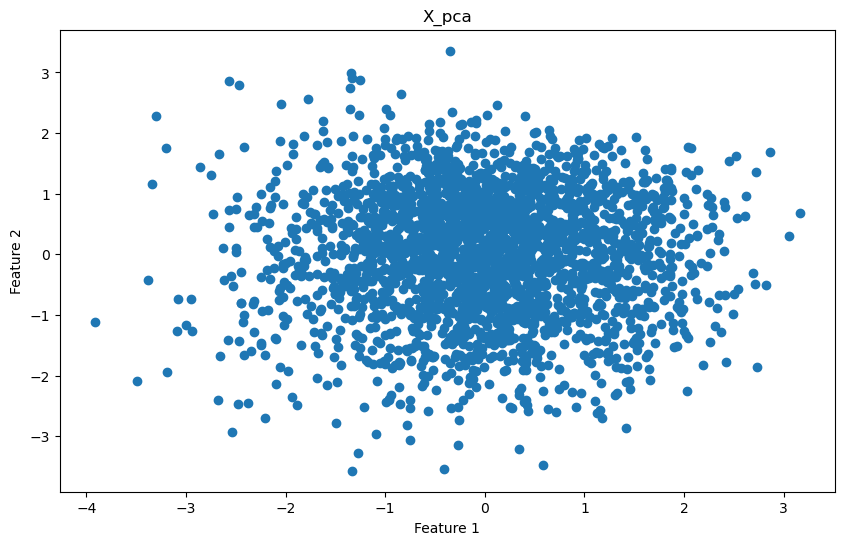

In [26]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('X_pca')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

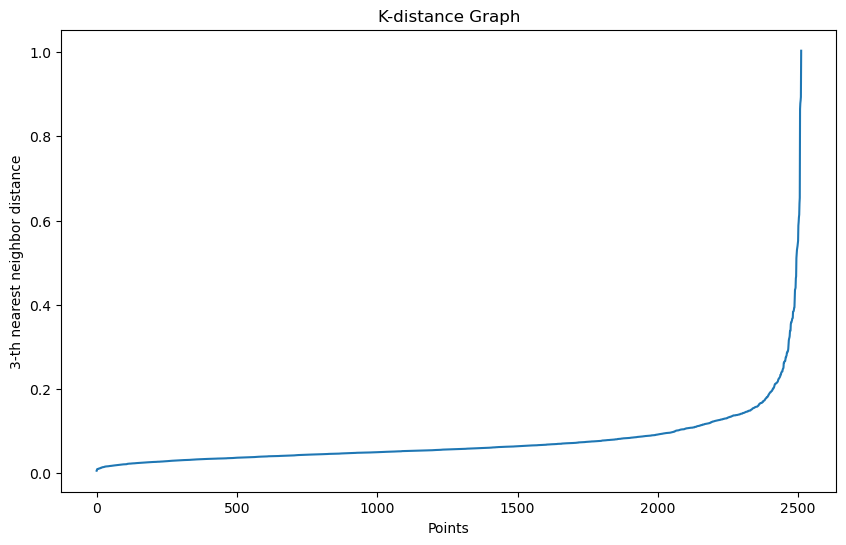

In [27]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_pca)
    distances, _ = neigh.kneighbors(X_pca)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_pca, k=3)

In [29]:
# Perform DBSCAN clustering
epsilon = 0.22  # Chosen based on k-distance graph
min_samples = 4  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_pca)

In [30]:
clusters = pd.DataFrame(clusters, columns=['Clusters'])

In [31]:
X_pca=pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
X_pca

,PCA_1,PCA_2
0,0.667563,0.467937
1,0.794979,-0.076916
2,-0.574265,0.438118
3,0.261950,0.092293
4,0.159392,-0.392454
...,...,...
2507,1.327170,-1.181736
2508,-1.176922,0.622059
2509,-1.301636,0.099544
2510,0.816114,1.465007


In [32]:
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
2507,0
2508,0
2509,0
2510,0


In [33]:
X_new = pd.concat([X_pca, clusters], axis=1)
X_new

,PCA_1,PCA_2,Clusters
0,0.667563,0.467937,0
1,0.794979,-0.076916,0
2,-0.574265,0.438118,0
3,0.261950,0.092293,0
4,0.159392,-0.392454,0
...,...,...,...
2507,1.327170,-1.181736,0
2508,-1.176922,0.622059,0
2509,-1.301636,0.099544,0
2510,0.816114,1.465007,0


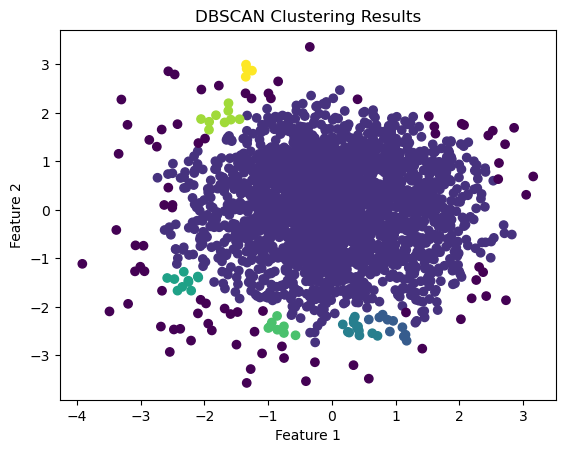

In [34]:
# Visualize the results
scatter = plt.scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], c=X_new.iloc[:,2], marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Points in dark violet indicate outilers.

PCA preserve only those features with the highest variance and may cuase some data loss. Alternatively, other unsupervised methods like autoencoders can be used, since they keep more variance than PCA.

In this part, we will use ensemble method which is Isolation Forest. The algortihm works well with outliers detection.

In [36]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [37]:
iso_forest.fit(data_scaled)
y_pred = iso_forest.predict(data_scaled)
anomaly_scores = iso_forest.decision_function(data_scaled)
unique, counts = np.unique(y_pred, return_counts=True)
anomaly_summary = dict(zip(unique, counts))
print(anomaly_summary)

{-1: 252, 1: 2260}


In [38]:
data_anomaly = pd.DataFrame(data_scaled, columns=data_scaled.columns)
data_anomaly['Outlier'] = y_pred
data_anomaly['Score'] = anomaly_scores

<AxesSubplot:xlabel='Score', ylabel='Count'>

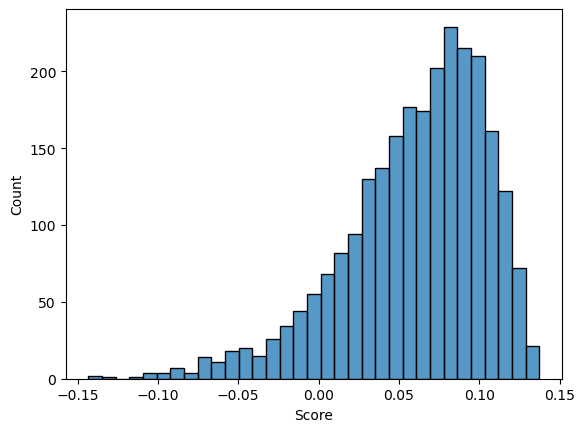

In [39]:
sns.histplot(data_anomaly['Score'])

<AxesSubplot:xlabel='TransactionAmount', ylabel='AccountBalance'>

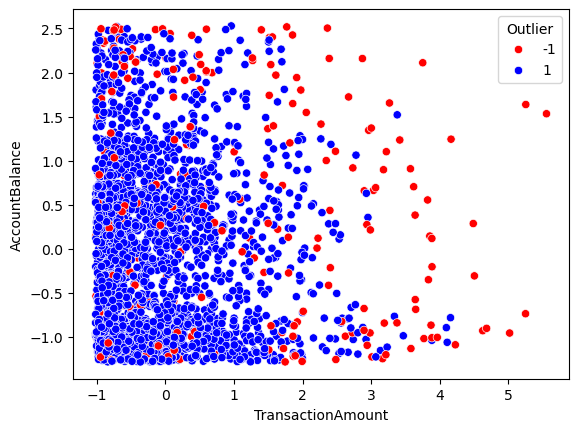

In [40]:
sns.scatterplot(x=data_anomaly['TransactionAmount'], y=data_anomaly['AccountBalance'], hue=data_anomaly['Outlier'],palette={1:'blue', -1:'red'})

Points marked in red indicated outliers.

### Model evaluation

Now, we will compare DBSCAN and IsolationForest algotihms performance.

In [35]:
silhouette_score(X_pca, dbscan.fit_predict(X_pca))

0.0612099764294445

silhouette_score near zero indicate that the clusters are overlapping, so the outliers aren't ideally separted form the data.

It is also possible to check other algorithms like One-Class SVM, Local Outlier Factor and K-Means. We can choose different contamination value to tune hyperparameter in Isolation Forest and validate the model for better performance.